<a href="https://colab.research.google.com/github/akashtepan/Airbnb-Bookings-Analysis/blob/main/Shubham_Tepan_Main_Notebook_EDA_Airbnb_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Bookings Analysis**

# Project Type - EDA
# Contribution - Shubham Tepan (Individual)

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

**Description of dataset columns-** 

* **id:** listing ID
* **name:** name of the listing
* **host_id:** host ID
* **host_name:** name of the host
* **neighbourhood_group:** location
* **neighbourhood:** area
* **latitude:** latitude coordinates
* **longitude:** longitude coordinates
* **room_type:** listing space type
* **price:** price in dollars
* **minimum_nights:** amount of nights minimum
* **number_of_reviews:** number of reviews
* **last_review:** latest review
* **reviews_per_month:** number of reviews per month
* **calculated_host_listings_count:** amount of listing per host
* **availability_365:** number of days when listing is available for booking


# **GitHub Link -**

# **The EDA process starts with the following steps -**

# **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr
!pip install geopy
import geopy
!pip install geopandas 
import geopandas as gpd
from geopy.geocoders import Nominatim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.0 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


# **Dataset Reading**

In [ ]:
# Mounting dataset which is in .csv format via Google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/airbnb/Copy of Airbnb NYC 2019.csv')

In [ ]:
# Displaying the first 5 rows of the dataset
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Exploratory Data Analysis**

In [ ]:
#The describe() method provides summary statistics for each numerical column in the dataset
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Getting information about the dataset
dataset.info()

# The dataset.info() function gives us a summary of the data contained in the dataset.
# It displays the number of non-null values for each column, data type of each column, 
# memory usage, and other information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Finding the number of rows and columns in the dataset
rows, columns = dataset.shape

# Printing the number of rows and columns in the dataset
print('The dataset has', rows, 'rows and', columns, 'columns.')

The dataset has 48895 rows and 16 columns.


In [ ]:
# Storing the column names of the dataset in a variable
columns = dataset.columns

# Printing the column names
print('Column Names:')
print(columns)

Column Names:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# **Getting Unique Values in the Important Columns**

In [ ]:
# Checking the number of unique values for each column in the dataset
dataset. nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
# Extracting the unique values of the neighbourhood_group column
dataset['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# Extracting the unique values of the room_type column
dataset['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# **Cleaning Dataset**

In [ ]:
# Missing values
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = dataset.isnull().sum().sort_values(ascending = False)
    percent = round(dataset.isnull().sum()/len(dataset)*100,2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing value percentage 
print(missing_percentage(dataset))

                                Total  Percent
last_review                     10052    20.56
reviews_per_month               10052    20.56
host_name                          21     0.04
name                               16     0.03
id                                  0     0.00
host_id                             0     0.00
neighbourhood_group                 0     0.00
neighbourhood                       0     0.00
latitude                            0     0.00
longitude                           0     0.00
room_type                           0     0.00
price                               0     0.00
minimum_nights                      0     0.00
number_of_reviews                   0     0.00
calculated_host_listings_count      0     0.00
availability_365                    0     0.00


In [ ]:
# Removing any missing values in the 'host_name' and 'name' columns
dataset.dropna(subset=['host_name','name'], inplace=True)

# Sorting the sum of missing values in each column in descending order
missing_value_sum = dataset.isnull().sum().sort_values(ascending = False)

# Printing the sum of missing values for each column
print('Sum of Missing Values for each Column:')
print(missing_value_sum)

Sum of Missing Values for each Column:
last_review                       10037
reviews_per_month                 10037
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Replacing NaN values in the 'reviews_per_month' and 'last_review' columns with 0
dataset.fillna({'reviews_per_month':0, 'last_review':0}, inplace=True)

# Sorting and displaying the sum of all remaining NaN values in the dataset
print('Sum of NaN values:')
print(dataset.isnull().sum().sort_values(ascending = False))

Sum of NaN values:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
# Finding the number of rows and columns in the dataset
dataset.shape

(48858, 16)

# **Region**

In [ ]:
# view the first 5 observations of the dataframe
loc = dataset[['neighbourhood_group','neighbourhood','latitude','longitude', 'room_type']]
loc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type
0,Brooklyn,Kensington,40.64749,-73.97237,Private room
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt
2,Manhattan,Harlem,40.80902,-73.94190,Private room
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt


In [ ]:
# Getting location address
address = 'New York City, NY'

# Getting the latitude and longitude of New York City, USA
geolocator = Nominatim(user_agent="Location_NY")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [ ]:
# Creating lists of latitudes and longitudes and combining them to form a location marker
Lat= 40.7127281
Long= -74.0060152
locations = list(zip(dataset.latitude, dataset.longitude))

# Visualizing all the locations on a world map using the Folium library and FastMarker Cluster to specify their positions
map = folium.Map(location=[Lat,Long], zoom_start=10)
FastMarkerCluster(data=locations).add_to(map)
map

## **This interactive map displays the areas within New York City, USA, selected from the Airbnb dataset for analysis.**

# **Exploring and Visualizing Data**

# What are the various room types and neighborhood groups present in the dataset?

In [ ]:
#Calculating the number of occurrences for each Neighborhood group
ng = dataset['neighbourhood_group'].value_counts() 
ng

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

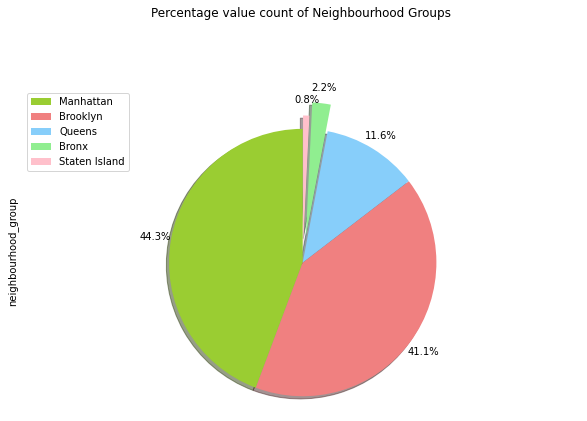

In [ ]:
# Plotting the distribution of counted values of different Neighborhood groups as a percentage of the total
colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
ng.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%', startangle=90, shadow=True,
        labels=None, pctdistance=1.12, colors=colors, explode=[0, 0, 0, 0.2, 0.1])
plt.title('Percentage value count of Neighbourhood Groups', y=1.2)
plt.axis('equal') 
plt.legend(labels=ng.index, loc='upper left')
plt.show() 

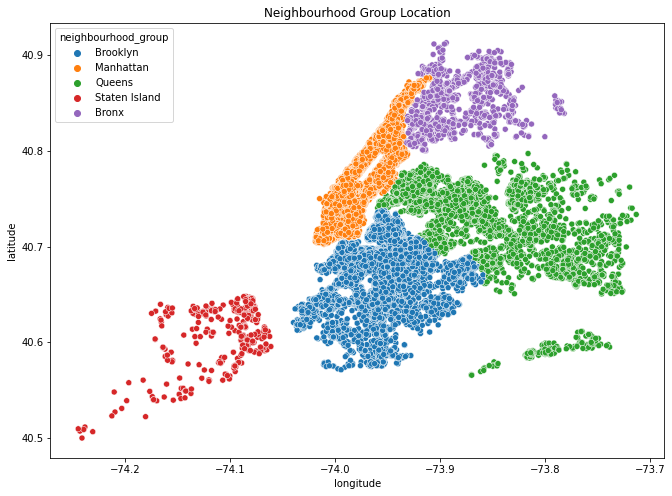

In [ ]:
# We use latitude and longitude to see where the different neighborhood groups are located
title = 'Neighbourhood Group Location'
plt.figure(figsize=(11,8))
ax = sns.scatterplot(x=loc.longitude, y=loc.latitude, hue=loc.neighbourhood_group)
ax.set_title(title)
plt.show()

In [ ]:
#Calculating the number of occurrences for each Room type
rt = dataset['room_type'].value_counts() 
rt

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

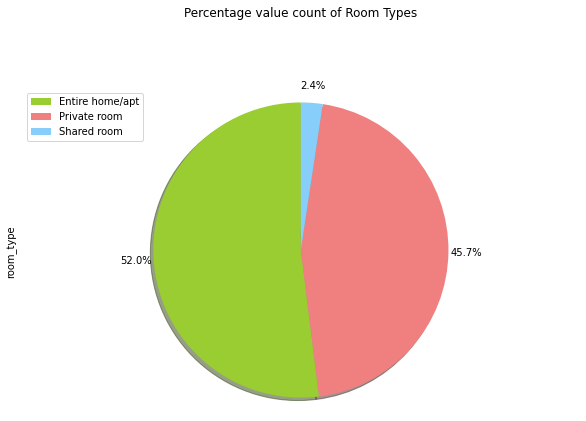

In [ ]:
# Plotting the distribution of counted values of different Neighborhood groups as a percentage of the total
rt = dataset['room_type'].value_counts()

colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0] * len(rt)

rt.plot.pie(figsize=(10,6), autopct='%1.1f%%', startangle=90, shadow=True,
        labels=None, pctdistance=1.12, colors=colors, explode=explode)

plt.title('Percentage value count of Room Types', y=1.2)
plt.axis('equal') 
plt.legend(labels=rt.index, loc='upper left')
plt.show()




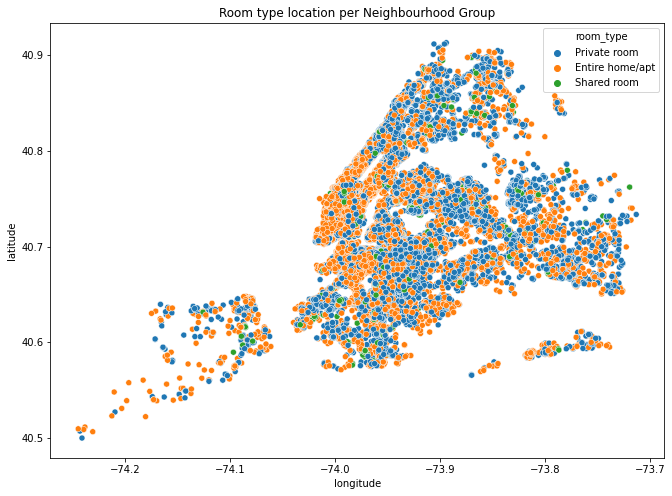

In [ ]:
 # We use latitude and longitude to see where the different Room type are located
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(11,8))
sns.scatterplot(x=loc.longitude, y=loc.latitude, hue=loc.room_type)
plt.title(title)
plt.show()

In [ ]:
#Calculating the mean price of each room type based on neighbourhood group and sorting the results in ascending order.
rt_mean_price = dataset.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values().unstack().sort_values('room_type', axis=1, ascending=True)
rt_mean_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


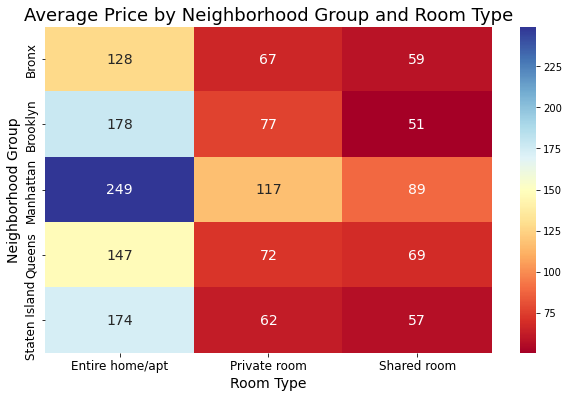

In [ ]:
# Plotting average price values by Neighborhood Group and Room Type
# Using a heatmap to clearly display the values and their relationships
grouped_data = dataset.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values().unstack().sort_values('room_type', axis=1, ascending=True)

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt='.0f', cmap='RdYlBu', annot_kws={"size": 14}, cbar=True)
plt.title('Average Price by Neighborhood Group and Room Type', fontsize=18)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Neighborhood Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

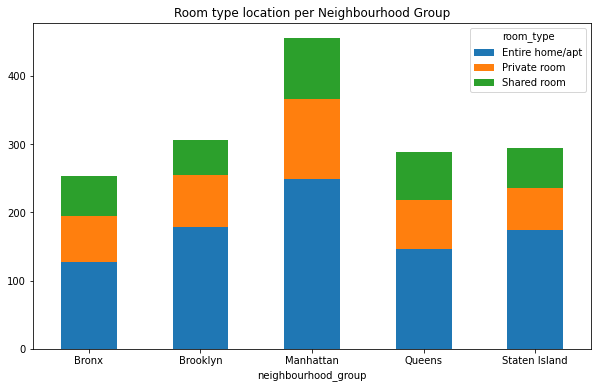

In [ ]:
# Plot mean price per room type in each neighbourhood group
plt.rcParams['figure.figsize']=(10,6)
rt_mean_price.plot(kind='bar', stacked=True)
plt.title('Room type location per Neighbourhood Group')
plt.xticks(rotation=0, ha='center')
plt.show()

# **The majority of apartments are located in Manhattan.**

# **Top 10 Apartment listings**

In [ ]:
#filter dataframe to include only 'Entire home/apt' room type
apt = dataset[dataset['room_type']=='Entire home/apt']

#group by host_id, host_name, neighbourhood, neighbourhood_group and count the number of room types
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group'])['room_type'].count().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)

#print the first 10 rows
list_apt.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,apartment
20204,219517861,Sonder (NYC),Financial District,Manhattan,210
6448,7503643,Vida,Greenpoint,Brooklyn,52
8428,12243051,Sonder,Financial District,Manhattan,51
20207,219517861,Sonder (NYC),Murray Hill,Manhattan,50
17825,120762452,Stanley,Murray Hill,Manhattan,49
19893,205031545,Red Awning,Midtown,Manhattan,49
12269,30283594,Kara,Hell's Kitchen,Manhattan,41
17444,107434423,Blueground,Chelsea,Manhattan,37
17621,113805886,Yaacov,Upper East Side,Manhattan,33
12271,30283594,Kara,Midtown,Manhattan,33


# **Top 10 Private room listings**

In [ ]:
#this code selects a subset of the dataset (only the rows where room_type is Private room) and stores it in a new variable
private = dataset[dataset['room_type']=='Private room']

#this code groups by the host_id, host_name and neighbourhood columns, counts the number of Private rooms and stores it in a new variable
list_private = private.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)

#this code prints the top 10 rows
list_private.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,private
15254,190921808,John,Hell's Kitchen,Manhattan,44
14018,137358866,Kazuya,Woodside,Queens,35
16294,238321374,Eyal,Upper West Side,Manhattan,32
15977,224414117,Gabriel,Hell's Kitchen,Manhattan,30
16028,226410657,Nina,Bedford-Stuyvesant,Brooklyn,26
16137,230192510,Zach,Fort Greene,Brooklyn,25
16379,242962235,Yuval,Ridgewood,Queens,23
16532,252604696,Erin,Chelsea,Manhattan,20
14017,137358866,Kazuya,Sunnyside,Queens,17
15754,216235179,Nina,Bushwick,Brooklyn,17


# **Top 10 Shared room listings**

In [ ]:
# Get all the data entries with room_type as Shared Room
shared_room = dataset[dataset['room_type']=='Shared room']

# Group by host_id, host_name and neighbourhood and count the number of shared rooms
list_shared = shared_room.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)

# Print the top 10 entries 
list_shared.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,shared
339,39528519,Max,Lower East Side,Manhattan,23
528,119669058,Melissa,Bedford-Stuyvesant,Brooklyn,18
650,201015598,Anchor,Bedford-Stuyvesant,Brooklyn,17
617,175730239,Baboucarr,Sunnyside,Queens,10
726,253906467,Erik,Hell's Kitchen,Manhattan,9
662,209386156,Abraham,East Harlem,Manhattan,9
634,187975743,R.Henry,Hell's Kitchen,Manhattan,8
713,248161322,Sergii,Bushwick,Brooklyn,8
292,30509656,Orit,Port Morris,Bronx,8
685,223087887,Jess & Ana,Corona,Queens,8


# **Price Exploration**

**The price data ranges from 0 to $10000. It varies depending on factors such as location, room type, neighborhood, and season. There are some values that are 0, which could be because of dynamic pricing or the host not wanting to share the price. We can also see from a boxplot that the data is spread out for high ranges of the price, regardless of region.**

In [ ]:
# The code below gives a summary of the 'price' column in the dataset
dataset['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

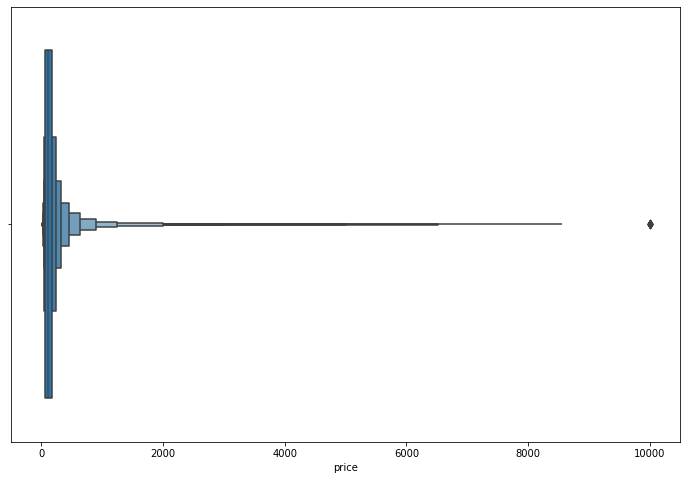

In [ ]:
# setting the size of the plot
plt.figure(figsize=(12,8))

# creating the boxenplot
sns.boxenplot(x='price',data=dataset)

# **The average cost of renting a room in the area**

**The average price per night for a stay in a city is important for travelers because it sets the budget for their trip. We can look at the average price for different types of rooms and different neighborhoods to see which are the most expensive and cheapest options.**

**From the data, we can see that:**

1. Staying in a shared room in Staten Island is the cheapest option, while renting a whole apartment in Manhattan is the most expensive.

2. The average price for private rooms and shared rooms in Manhattan is higher compared to other neighborhoods. This shows that Manhattan is a more expensive place to stay.

3. The Bronx is the cheapest neighborhood to stay in, based on the room type and neighborhood group.

4. Although shared rooms in Staten Island are the cheapest, renting an apartment there is not the cheapest option. This could be because it is a popular location for families who want a break from the city.



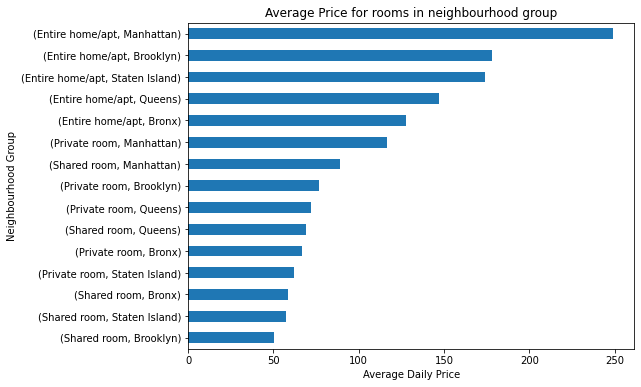

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.645503
                Queens               147.050573
                Staten Island        173.846591
                Brooklyn             178.362609
                Manhattan            249.238211
Private room    Staten Island         62.292553
                Bronx                 66.788344
                Queens                71.776855
                Brooklyn              76.510619
                Manhattan            116.805594
Shared room     Brooklyn              50.527845
                Staten Island         57.444444
                Bronx                 58.610169
                Queens                69.020202
                Manhattan             88.977083

In [ ]:
# Plotting a bar graph to visualize the Average Price for rooms in neighbourhood group
plt.figure(figsize=(8,6))

# grouping the dataframe by room type and neighbourhood group
df = dataset.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)

# plotting the bar graph
df.plot(kind='barh')

# setting the title
plt.title('Average Price for rooms in neighbourhood group')

# labeling the y-axis
plt.ylabel('Neighbourhood Group')

# labeling the x-axis
plt.xlabel('Average Daily Price')

# displaying the graph
plt.show()

# printing the table
print('List of Average Price per night based on the neighbourhood group')

# sorting the values based on room type
pd.DataFrame(df).sort_values(by='room_type')

# **Top 10 most expensive locality in Airbnb listing**

Top 10 most expensive localities in Airbnb listing


,Average price per night based on neighborhood
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.086957
Flatiron District,341.925000
Randall Manor,336.000000


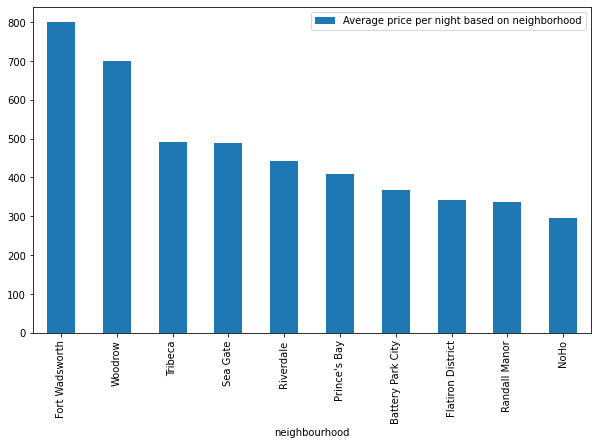

In [ ]:
# Calculate average price per night for each neighborhood
df4 = dataset.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean")

# Sort by average price in descending order
df4 = df4.sort_values(by="price", ascending=False)

# Select the top 10 most expensive neighborhoods
df4 = df4.head(10)

# Rename "price" column to "Average price per night based on neighborhood"
df4 = df4.rename(index=str, columns={"price": "Average price per night based on neighborhood"})

# Plot the data as a bar graph
df4.plot(kind='bar')

# Display the results as a table
print("Top 10 most expensive localities in Airbnb listing")
display(pd.DataFrame(df4))

# Show the plot
plt.show()


# **Top 10 least locality in Airbnb listing**

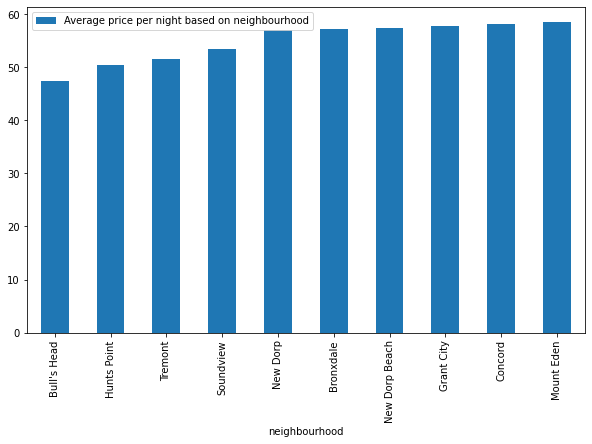

Top 10 least localities in Airbnb listing


,Average price per night based on neighbourhood
neighbourhood,
Bull's Head,47.333333
Hunts Point,50.500000
Tremont,51.545455
Soundview,53.466667
New Dorp,57.000000
Bronxdale,57.105263
New Dorp Beach,57.400000
Grant City,57.666667
Concord,58.192308


In [ ]:
# Group by neighbourhood and calculate the average price
df5 = dataset.groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price")

# Rename the column with a meaningful name
df5.rename(index=str, columns={"price": "Average price per night based on neighbourhood"}, inplace=True)

# Get the top 10 least expensive neighbourhoods
df5 = df5.head(10)

# Plot the data as a bar graph
df5.plot(kind='bar')

# Show the plot
plt.show()

# Print the result
print("Top 10 least localities in Airbnb listing")
display(pd.DataFrame(df5))

# **Largest number of Localities listed**

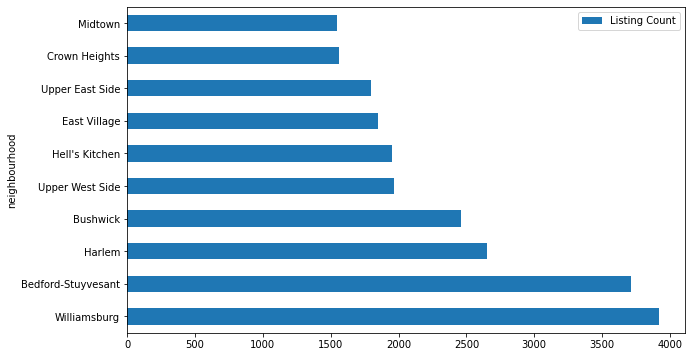

,Listing Count
neighbourhood,
Williamsburg,3917
Bedford-Stuyvesant,3713
Harlem,2655
Bushwick,2462
Upper West Side,1969
Hell's Kitchen,1954
East Village,1852
Upper East Side,1797
Crown Heights,1563


In [ ]:
# Group the dataset by neighborhood and count the number of listings for each host in each neighborhood
df6 = dataset.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name']

# Sort the data by the number of listings in descending order
df6 = df6.sort_values(by='count',ascending=False)

# Rename the count column to 'Listing Count'
df6 = df6.rename(index=str, columns={'count': 'Listing Count'})

# Keep only the top 10 neighborhoods
df6 = df6.head(10)

# Plot the data as a horizontal bar chart
df6.plot(kind='barh')

# Show the plot
plt.show()

# Convert the data to a DataFrame and display it
pd.DataFrame(df6.head(10))


# **Smallest number of localities listed**

Least Listing number of count


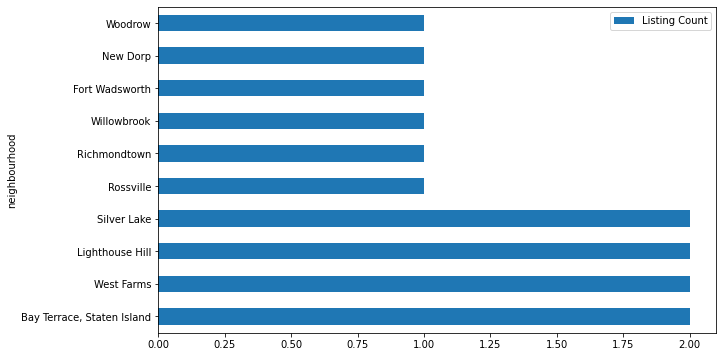

,Listing Count
neighbourhood,
"Bay Terrace, Staten Island",2
West Farms,2
Lighthouse Hill,2
Silver Lake,2
Rossville,1
Richmondtown,1
Willowbrook,1
Fort Wadsworth,1
New Dorp,1


In [ ]:
# Print a message to indicate that we're showing the least number of listings
print('Least Listing number of count')

# Group the dataset by neighborhood and count the number of listings for each host in each neighborhood
df7 = dataset.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name']

# Sort the data by the number of listings in descending order
df7 = df7.sort_values(by='count',ascending=False)

# Rename the count column to 'Listing Count'
df7 = df7.rename(index=str, columns={'count': 'Listing Count'})

# Keep only the bottom 10 neighborhoods
df7 = df7.tail(10)

# Plot the data as a horizontal bar chart
df7.plot(kind='barh')

# Show the plot
plt.show()

# Convert the data to a DataFrame and display it
pd.DataFrame(df7.tail(10))


# **Location and Review Score**

**We are looking at the reviews of different neighborhoods to help tourists make informed decisions. To get a clearer picture, we are only considering neighborhoods that have more than 50 reviews. The graph shows that Brooklyn has the most reviews compared to Manhattan and Staten Island has less reviews than the other neighborhoods. However, we can't conclude anything more as the data is limited.**

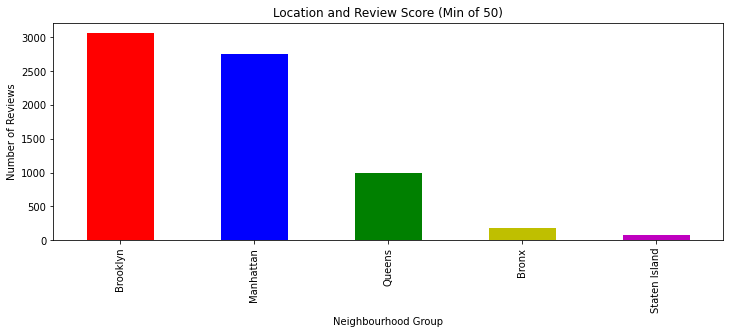

Count of Review vs Neighbourhood Group


,neighbourhood_group
Brooklyn,3063
Manhattan,2747
Queens,997
Bronx,187
Staten Island,81


In [ ]:
# Creating a figure with a specified size
fig = plt.figure(figsize=(12,4))

# Filtering the dataset to only include reviews with 50 or more reviews
review_50 = dataset[dataset['number_of_reviews'] >= 50]

# Counting the number of reviews in each neighbourhood group
df8 = review_50['neighbourhood_group'].value_counts()

# Plotting a bar graph of the neighbourhood group and the number of reviews
df8.plot(kind='bar', color=['r','b','g','y','m'])

# Adding a title, y-axis label, and x-axis label to the graph
plt.title('Location and Review Score (Min of 50)')
plt.ylabel('Number of Reviews')
plt.xlabel('Neighbourhood Group')

# Showing the plot
plt.show()

# Printing the count of reviews versus neighbourhood group
print('Count of Review vs Neighbourhood Group')
pd.DataFrame(df8)


**The below plot showcases the top 5 hosts, with the highest number of reviews. It appears that Michael is leading the chart, having received the most number of reviews.**

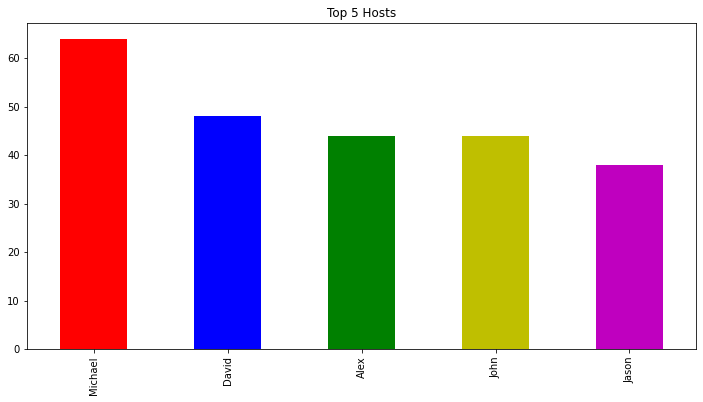

In [ ]:
# Creating a figure with a specified size
plt.figure(figsize=(12,6))

# Selecting the first 2 rows of the review_50 dataset
review_50.head(2)

# Counting the number of listings for each host and selecting the top 5
df9 = review_50['host_name'].value_counts()[:5]

# Plotting a bar graph of the top 5 hosts and the number of listings
df9.plot(kind='bar', color=['r','b','g','y','m'])

# Adding a title to the graph
plt.title('Top 5 Hosts')

# Showing the plot
plt.show()

# **Top 20 Hosts by Availability**

In [ ]:
# Group the original dataframe (df) by the columns 'host_name', 'neighbourhood_group', and 'room_type'
grouped = dataset.groupby(['host_name','neighbourhood_group','room_type'])

# Use the count() method on the grouped data to find the number of occurrences of each group
counts = grouped['availability_365'].count().reset_index()

# Sort the counts dataframe in descending order by the 'availability_365' column
top_20 = counts.sort_values(by='availability_365', ascending=False).head(20)
top_20

,host_name,neighbourhood_group,room_type,availability_365
16545,Sonder (NYC),Manhattan,Entire home/apt,319
2294,Blueground,Manhattan,Entire home/apt,230
12296,Michael,Manhattan,Entire home/apt,143
9188,Kara,Manhattan,Entire home/apt,129
4127,David,Manhattan,Entire home/apt,117
12434,Mike,Manhattan,Entire home/apt,109
545,Alex,Manhattan,Entire home/apt,98
16544,Sonder,Manhattan,Entire home/apt,96
9547,Ken,Manhattan,Entire home/apt,95
8224,Jeremy & Laura,Manhattan,Entire home/apt,95


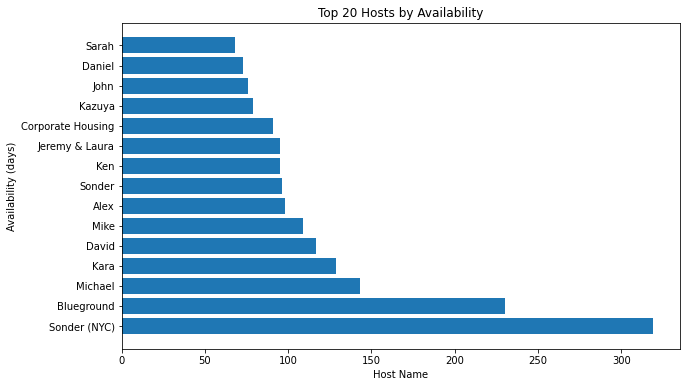

In [ ]:
# Extract the x and y values for the bar graph
x = top_20['host_name']
y = top_20['availability_365']

# Create the bar graph
plt.barh(x, y)

# Add labels and title to the graph
plt.xlabel("Host Name")
plt.ylabel("Availability (days)")
plt.title("Top 20 Hosts by Availability")

# Show the graph
plt.show()

# **Average listing price for each Neighborhood Group**

In [ ]:
# Group the dataframe 'review_50' by 'neighbourhood_group' and 'room_type'
grouped = review_50.groupby(['neighbourhood_group', 'room_type'])

# Calculate the mean values for each group
mean_values = grouped.mean()

# Drop the columns 'id', 'calculated_host_listings_count', and 'reviews_per_month'
mean_values = mean_values.drop(['id', 'calculated_host_listings_count', 'reviews_per_month'], axis=1)

# Sort the mean_values dataframe by 'neighbourhood_group'
sorted_mean_values = mean_values.sort_values('neighbourhood_group')
sorted_mean_values

host_id   latitude  longitude  \
neighbourhood_group room_type                                             
Bronx               Entire home/apt  6.834402e+07  40.845571 -73.874437   
                    Private room     5.771343e+07  40.848007 -73.894449   
                    Shared room      8.610883e+07  40.840340 -73.830070   
Brooklyn            Entire home/apt  3.800972e+07  40.681858 -73.950491   
                    Private room     3.718687e+07  40.684031 -73.948452   
                    Shared room      3.795770e+07  40.668842 -73.941362   
Manhattan           Entire home/apt  3.756310e+07  40.760924 -73.975424   
                    Private room     4.193722e+07  40.776966 -73.968221   
                    Shared room      7.222840e+07  40.772727 -73.972424   
Queens              Entire home/apt  6.497462e+07  40.728087 -73.864378   
                    Private room     7.468608e+07  40.733657 -73.863445   
                    Shared room      9.552170e+07  40.716744 -73.843495   
Staten Island       Entire home/apt  7.416233e+07  40.615301 -74.098382   
                    Private room     5.922092e+07  40.622883 -74.096828   

                                          price  minimum_nights  \
neighbourhood_group room_type                                     
Bronx               Entire home/apt  107.000000        2.212500   
                    Private room      53.132075        2.084906   
                    Shared room       20.000000        1.000000   
Brooklyn            Entire home/apt  158.858362        3.923208   
                    Private room      71.594192        2.731554   
                    Shared room       40.806452        1.967742   
Manhattan           Entire home/apt  218.530612        4.695335   
                    Private room      97.805065        3.119724   
                    Shared room       62.444444        1.916667   
Queens              Entire home/apt  124.053012        2.725301   
                    Private room      61.807356        2.402802   
                    Shared room       43.181818        1.363636   
Staten Island       Entire home/apt  105.652174        3.108696   
                    Private room      54.714286        2.857143   

                                     number_of_reviews  availability_365  
neighbourhood_group room_type                                             
Bronx               Entire home/apt         101.325000        197.387500  
                    Private room            100.566038        177.660377  
                    Shared room             116.000000          5.000000  
Brooklyn            Entire home/apt         109.444824        171.709898  
                    Private room            109.997645        155.525118  
                    Shared room             105.322581        163.258065  
Manhattan           Entire home/apt         106.817784        157.715015  
                    Private room            117.434382        144.940138  
                    Shared room              92.916667        170.402778  
Queens              Entire home/apt         104.643373        184.932530  
                    Private room            116.199650        187.637478  
                    Shared room             122.454545        170.727273  
Staten Island       Entire home/apt          95.065217        197.217391  
                    Private room            105.742857        270.742857

# **Conclusion**

# **Based on the given dataset of Airbnb listings, the following conclusions can be drawn:**

1. Average Listing Prices: The data analysis can provide information on the average prices of different types of listings in different neighborhoods, which can help to understand the supply and demand dynamics in the market.

2. Types of Room Types and Neighborhood Group: The available room types in the dataset include Entire home/apt, Private room, and Shared room. The neighborhood groups include Brooklyn, Manhattan, Queens, Staten Island, and Bronx.

3. Range of Prices for Airbnb Listings: The prices for Airbnb listings in the dataset range from a minimum of 0 to a maximum of 10,000 dollar or more, with a majority of listings being priced between 100 to 500 dollar.

4. Average Yearly Rent and Availability: The average yearly rent of properties in different locations varies based on the minimum nights and price. Properties with higher minimum nights and prices tend to have higher average yearly rent and lower availability.

5. Average Cost and Spread of Prices in Different Neighborhoods: The average cost of Airbnb listings in different neighborhoods varies. Some neighborhoods tend to have higher average costs compared to others. The spread of prices in different neighborhoods also varies, with some neighborhoods having a wider range of prices compared to others.

6. Host Activity: The data analysis can also provide insights into the number of active hosts in different neighborhoods and the types of rooms they offer.
